In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cnn model
import glob
import seaborn
import itertools
import numpy as np
import os, fnmatch
import pandas as pd
from numpy import std
from numpy import mean
from numpy import dstack
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.utils import shuffle
from scipy.io.wavfile import read
from keras.models import Sequential
# from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization

# Audio
import librosa.display, librosa
from librosa.util import normalize as normalize
import IPython.display as ipd

In [ ]:
# Note: colab has changed the tensorflow version from 27 March 2020
import numpy as np
import pandas as pd
import pytz
import itertools
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import cycle
from datetime import datetime
from sklearn.utils import shuffle

# Machine Learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score, auc

# Deep Learning
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import History, EarlyStopping, ModelCheckpoint, CSVLogger
from keras.models import load_model

In [ ]:
import pandas as pd
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf
import pathlib
import code
import queue
!pip install pydub
from pydub import AudioSegment
from pydub.playback import play

In [ ]:
# https://medium.com/in-pursuit-of-artificial-intelligence/deep-learning-using-raw-audio-files-66d5e7bf4cca

AUDIO_LENGTH = 25000
def create_data(source_path):
  count = 0
  calc = 0
  cut = 0
  pad = 0
  features, labels = [], []
  for paths, subdirs, files in os.walk(source_path):
    for name in files:
      splitting = paths.split("/")
      count = count +1
      path = os.path.join(paths, name)
      
      audio, _ = librosa.load(path, sr=48000, mono=True)
      audio_buf = audio.reshape(-1, 1)

      # print(audio_buf.shape)
      calc = calc + audio_buf.shape[0]

      audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
      original_length = len(audio_buf)
      # print(original_length, " ", np.round(np.mean(audio_buf), 4), " ", np.std(audio_buf))
      if original_length < AUDIO_LENGTH:
          pad = pad +1
          audio_buf = np.concatenate((audio_buf, np.zeros(shape=(AUDIO_LENGTH - original_length, 1))))
          print(count, ' PAD New length =', len(audio_buf))
      elif original_length > AUDIO_LENGTH:
          cut = cut + 1
          audio_buf = audio_buf[0 : AUDIO_LENGTH]
          print(count, ' CUT New length =', len(audio_buf))

      features.append(audio_buf)
      # print(count, " ", str(splitting[6]), "\n")
      if splitting[6] == "Healthy":
        labels.append(0)
      elif splitting[6] == "Patients":
        labels.append(1)
  print("cut: ", cut, " pad: ", pad, " mean: ", np.mean(calc))
  return np.array(features), np.array(labels, dtype = np.int)
 
start = datetime.now()
X, y = create_data("/content/drive/MyDrive/datasets/dysphasia")
# X, y = create_data("/content/drive/MyDrive/datasets/testset_Dysphasia")
print("Creation time is: ", datetime.now() - start)
print(X.shape, " ", y.shape)

1  CUT New length = 25000
2  CUT New length = 25000
3  CUT New length = 25000
4  CUT New length = 25000
5  CUT New length = 25000
6  CUT New length = 25000
7  PAD New length = 25000
8  PAD New length = 25000
9  CUT New length = 25000
10  PAD New length = 25000
11  PAD New length = 25000
12  PAD New length = 25000
13  PAD New length = 25000
14  PAD New length = 25000
15  PAD New length = 25000
16  PAD New length = 25000
17  PAD New length = 25000
18  PAD New length = 25000
19  PAD New length = 25000
20  PAD New length = 25000
21  CUT New length = 25000
22  CUT New length = 25000
23  CUT New length = 25000
24  CUT New length = 25000
25  CUT New length = 25000
26  CUT New length = 25000
27  CUT New length = 25000
28  CUT New length = 25000
29  PAD New length = 25000
30  PAD New length = 25000
31  PAD New length = 25000
32  PAD New length = 25000
33  PAD New length = 25000
34  PAD New length = 25000
35  PAD New length = 25000
36  PAD New length = 25000
37  PAD New length = 25000
38  PAD Ne

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras import regularizers
from keras.layers import Lambda
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
import numpy as np
import pickle
import os
from sklearn.model_selection import train_test_split

In [ ]:
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)

print(X.shape, " ", y.shape)

(3853, 25000, 1)   (3853,)


In [ ]:
np.save('/content/drive/My Drive/saved_arrays/X_dysphasia_1D_equal.npy', X)
np.save('/content/drive/My Drive/saved_arrays/y_dysphasia_1D_equal.npy', y)

In [ ]:
X = np.load('/content/drive/My Drive/saved_arrays/X_dysphasia_1D_equal.npy', allow_pickle=True)
y = np.load('/content/drive/My Drive/saved_arrays/y_dysphasia_1D_equal.npy')
print(X.shape, " ", y.shape)

(3853, 25000, 1)   (3853,)


In [ ]:
# labelling Information, the code of this cell is updated and not executed
print('Note:> 0=> is healthy and 1=> is dysphasia \n')
unique_elements, counts_elements = np.unique(y, return_counts=True)
classes_array = np.asarray((unique_elements, counts_elements))
print(classes_array,'\n')
print("Total files are:", classes_array[1][0]+classes_array[1][1])

Note:> 0=> is healthy and 1=> is dysphasia 

[[   0    1]
 [1680 2173]] 

Total files are: 3853


In [ ]:
AUDIO_LENGTH = 25000

def get_model(num_classes=2):
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[AUDIO_LENGTH, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))

    # m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # print(m.summary())
    return m

In [ ]:
get_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 6250, 128)         10368     
_________________________________________________________________
batch_normalization_4 (Batch (None, 6250, 128)         512       
_________________________________________________________________
activation_4 (Activation)    (None, 6250, 128)         0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1562, 128)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1562, 128)         49280     
_________________________________________________________________
batch_normalization_5 (Batch (None, 1562, 128)         512       
_________________________________________________________________
activation_5 (Activation)    (None, 1562, 128)        

In [ ]:
# confusion matrix drawing for each fold

def data_labelling(intLabel):
  Y = []
  length = len(intLabel)
  for i in range(length):
    if intLabel[i] == 0:
      Y.append("Healthy")
    elif intLabel[i] == 1:
      Y.append("Dysphasia")
  return Y

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/saveModels/dysphasia_1D/cnf_mat/'+title+'.png', bbox_inches='tight')

def cnf_matrix_for_each_fold(model, testX, testY, fold_no):
  y_pred = model.predict(testX)
  y_pred = np.rint(y_pred.argmax(axis=1))
  y_pred = y_pred.tolist()
  testY = np.rint(testY)
  testY = testY.tolist()

  y_true = data_labelling(testY)
  y_predicted = data_labelling(y_pred)

  cnf_matrix = confusion_matrix(y_true, y_predicted, labels=['Healthy', 'Dysphasia'])
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=['Healthy', 'Dysphasia'], title='Confusion matrix for fold No._'+ str(fold_no))

In [ ]:
# Plotting and estimation of FPR, TPR for ROC

def draw_roc(model, X_test, y_test, fold_no):
  y_pred = model.predict(X_test)
  y_true = y_test
  y_true = y_true.astype(int)
  n_classes = y_test.shape[1]
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):
      fpr[i], tpr[i], thresholds = roc_curve(y_true[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  colors = cycle(['green', 'red'])
  figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
  for i, color in zip(range(n_classes), colors):
      name = ['Helathy', 'Dysphasia']
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='{0} (Area under the curve =  {1:0.4f})' ''.format(name[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k-', linestyle='--', lw=1.5)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic (ROC) curve for fold number '+ str(fold_no))
  plt.legend(loc="lower right")
  plt.savefig('/content/drive/My Drive/saveModels/dysphasia_1D/ROC/ROC for fold no.'+str(fold_no)+'.png', bbox_inches='tight')
  plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 00027: early stopping
Score for fold 1: loss of 0.33509817719459534; accuracy of 88.08290362358093% and training_loss: 0.23945015668869019; traing_acc: 92.64493584632874%
fold 1 training time is 0:03:32.741678
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

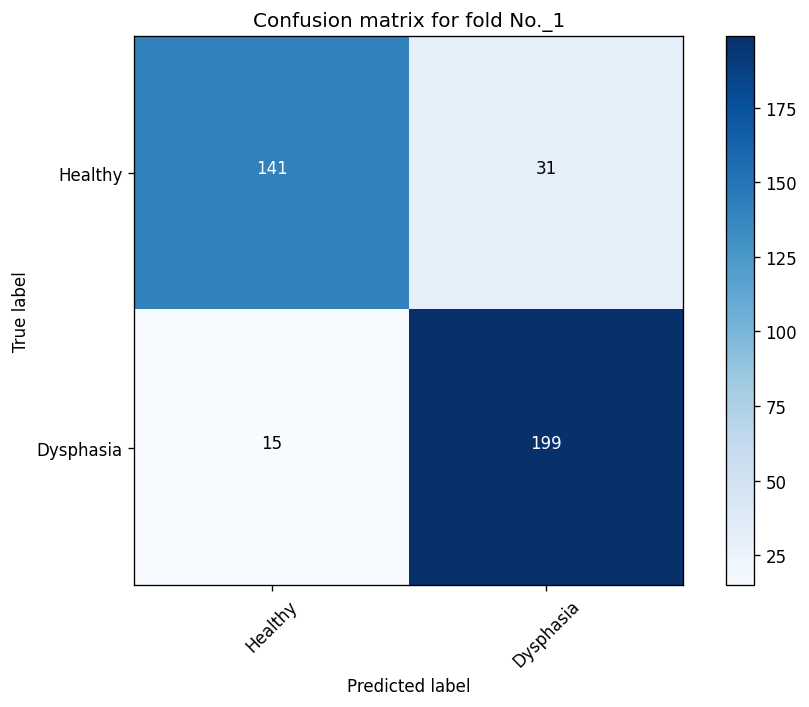

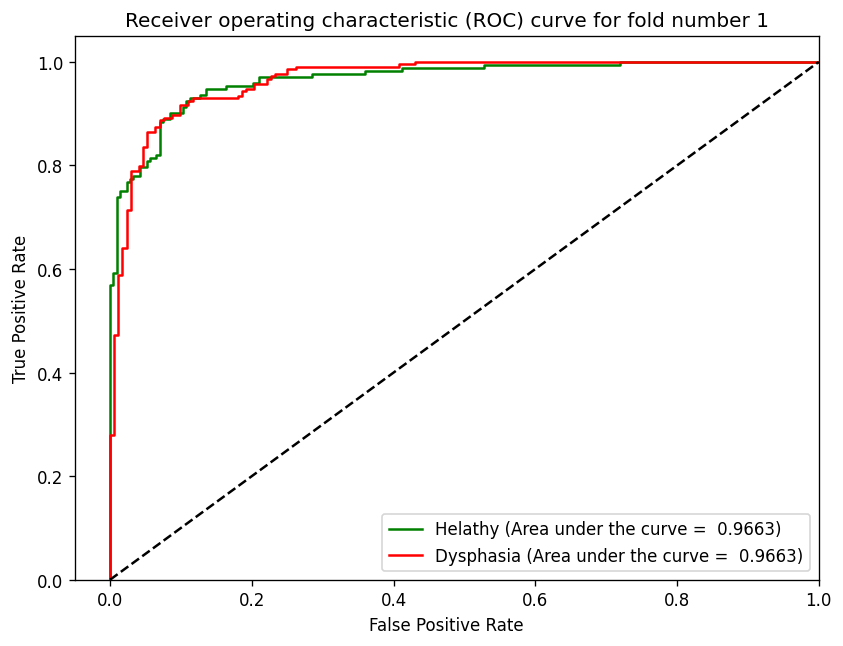

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 00061: early stopping
Score for fold 2: loss of 0.20924176275730133; accuracy of 95.85492014884949% and training_loss: 0.17969737946987152; traing_acc: 95.76002359390259%
fold 2 training time is 0:06:18.091003
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

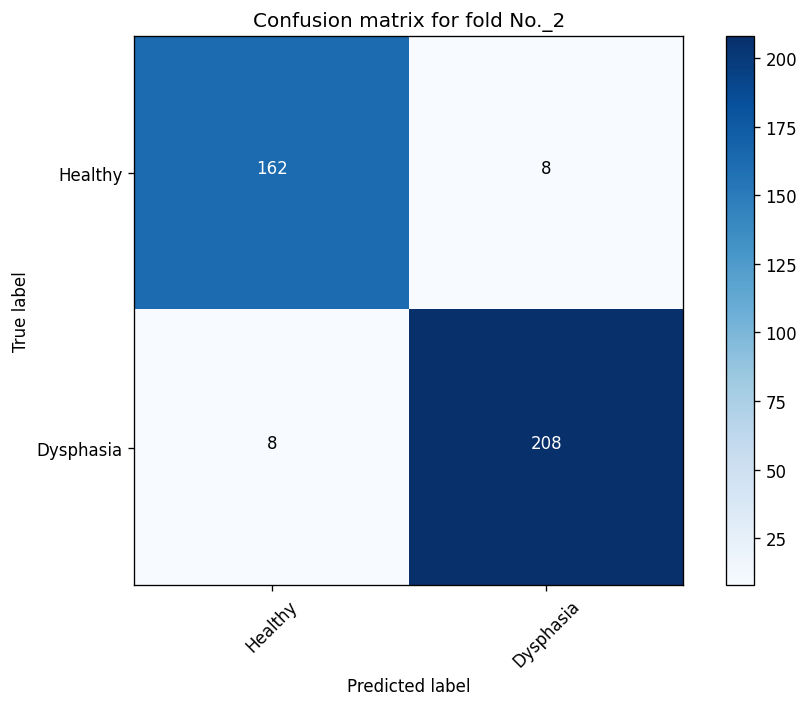

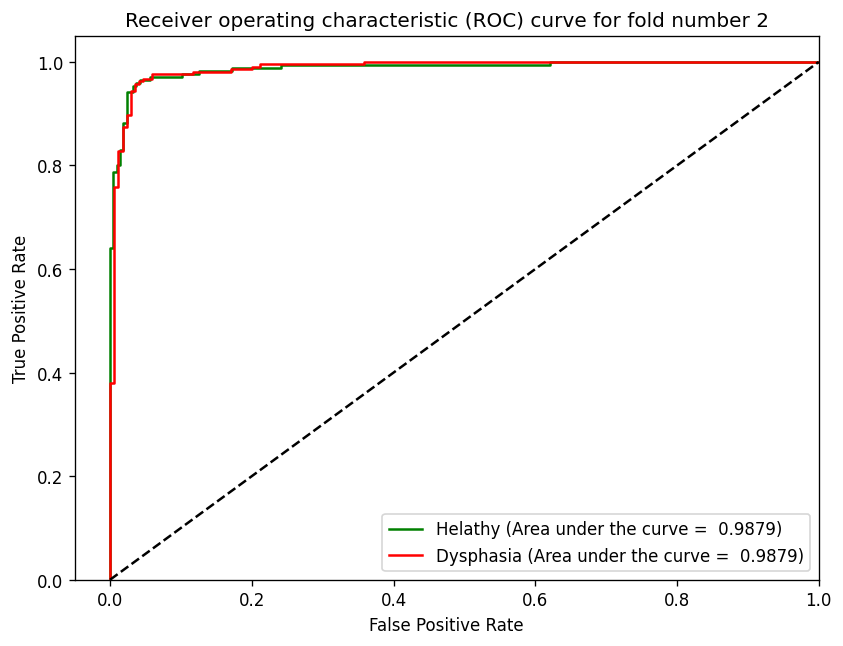

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 00030: early stopping
Score for fold 3: loss of 0.20947182178497314; accuracy of 93.78238320350647% and training_loss: 0.11010989546775818; traing_acc: 97.72137403488159%
fold 3 training time is 0:03:29.316921
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

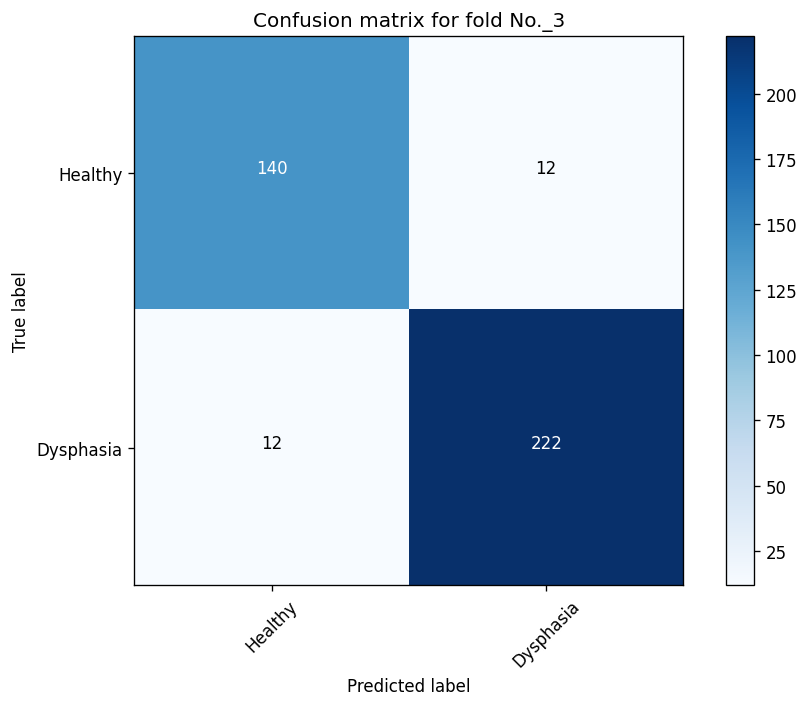

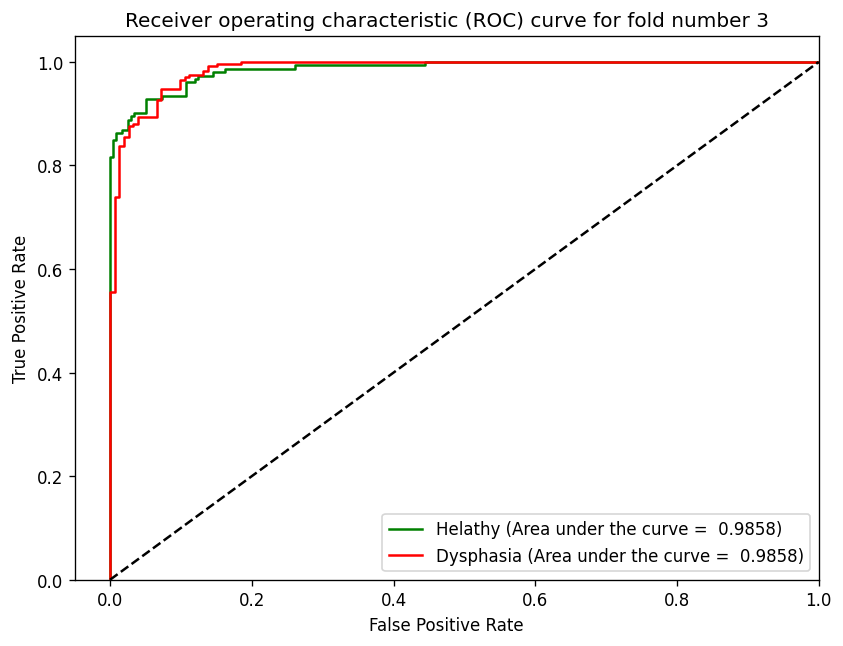

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 00066: early stopping
Score for fold 4: loss of 0.1459449976682663; accuracy of 96.62337899208069% and training_loss: 0.07415542006492615; traing_acc: 99.25028681755066%
fold 4 training time is 0:07:30.091647
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

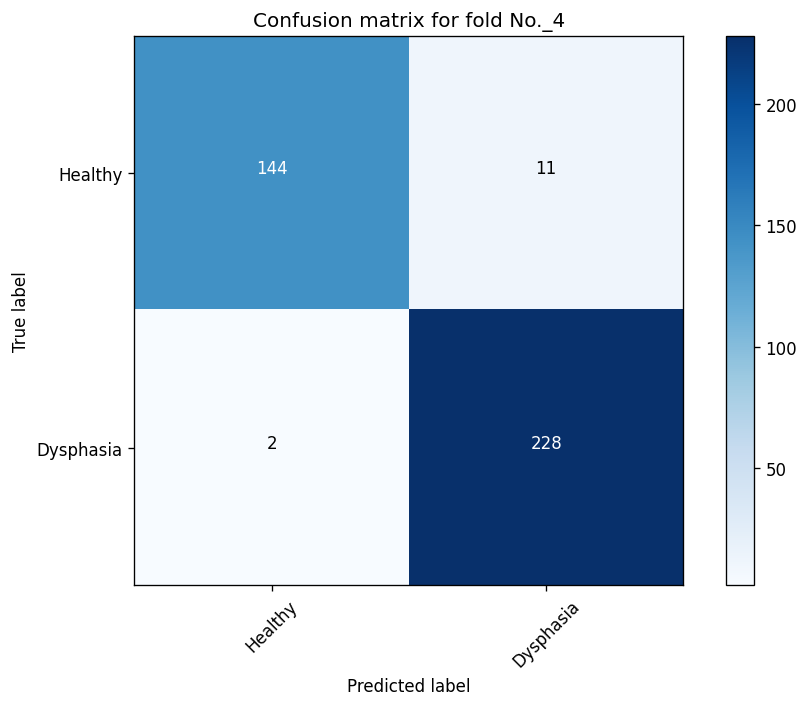

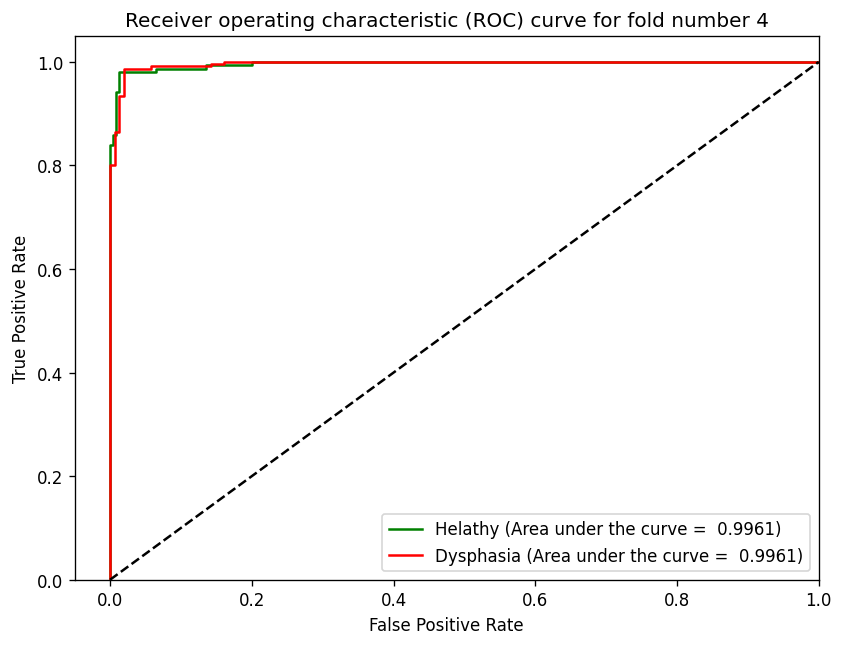

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 00108: early stopping
Score for fold 5: loss of 0.2736666798591614; accuracy of 94.02597546577454% and training_loss: 0.1431586593389511; traing_acc: 96.68396711349487%
fold 5 training time is 0:11:29.253997
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

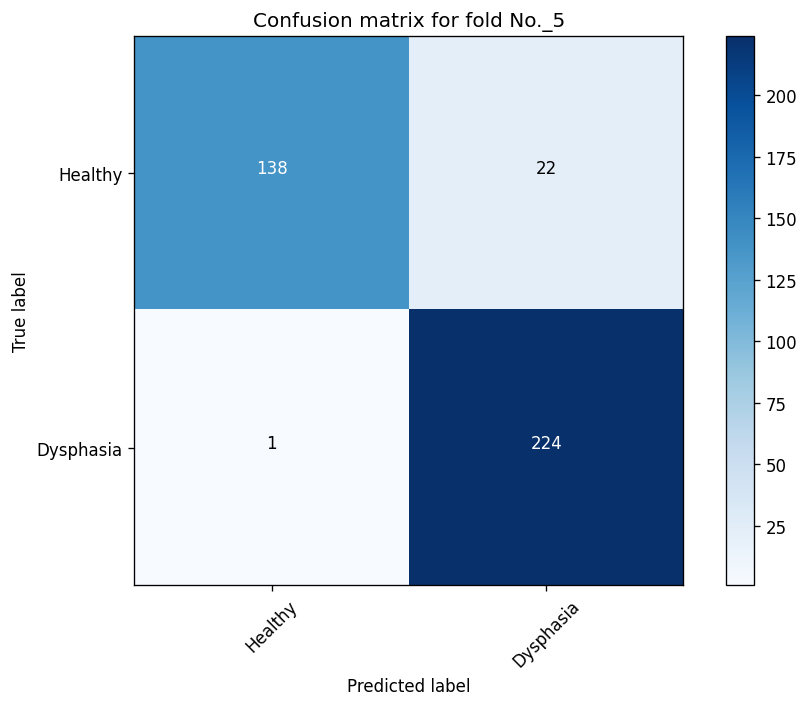

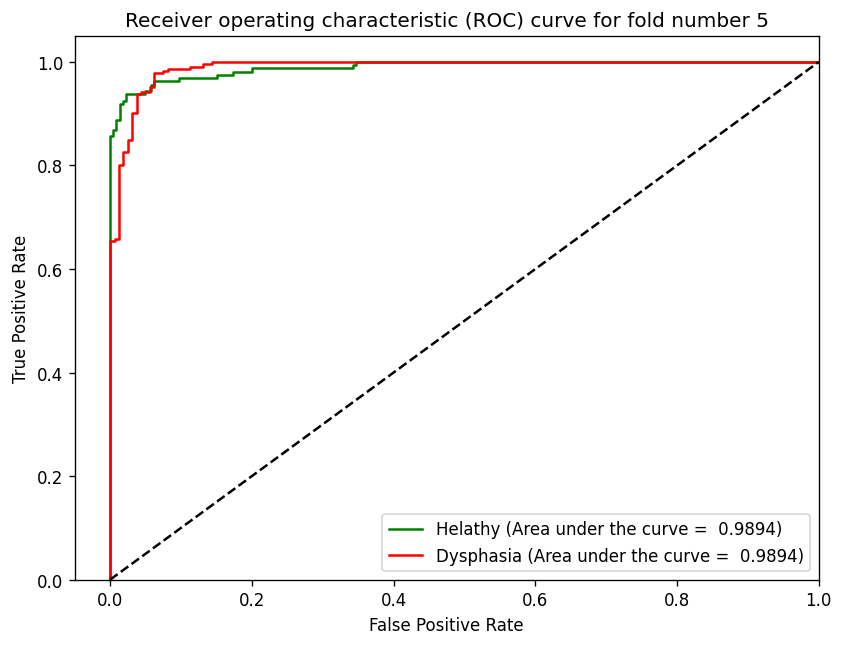

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 00049: early stopping
Score for fold 6: loss of 0.23106223344802856; accuracy of 95.32467722892761% and training_loss: 0.08526141196489334; traing_acc: 99.1349458694458%
fold 6 training time is 0:05:04.738157
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

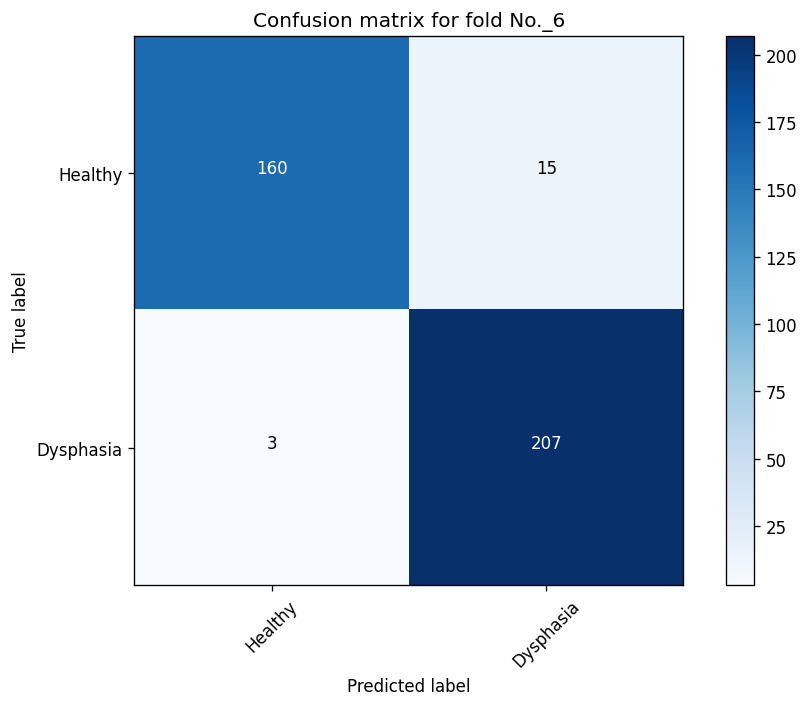

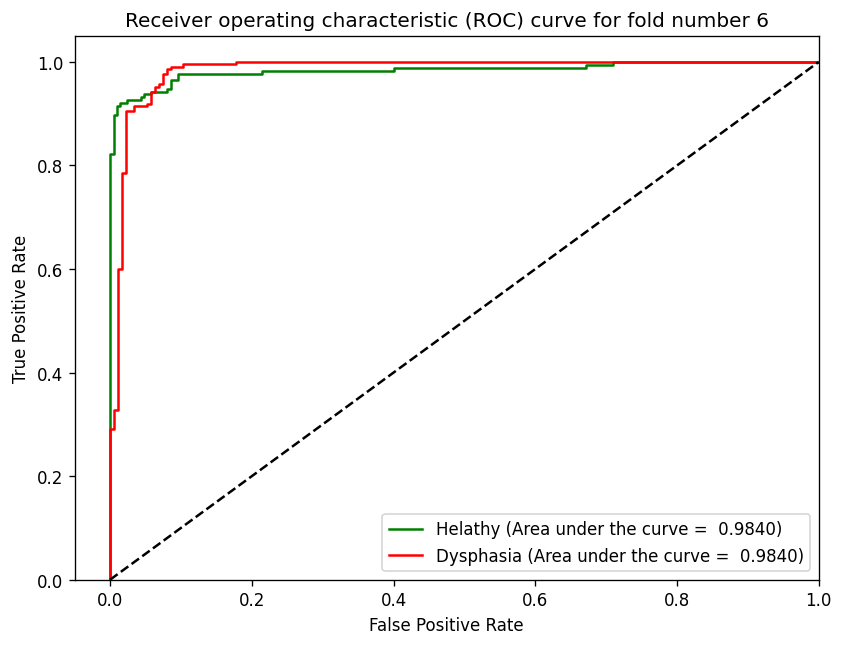

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 00054: early stopping
Score for fold 7: loss of 0.16810153424739838; accuracy of 96.10389471054077% and training_loss: 0.08141472935676575; traing_acc: 98.93310070037842%
fold 7 training time is 0:06:30.071182
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

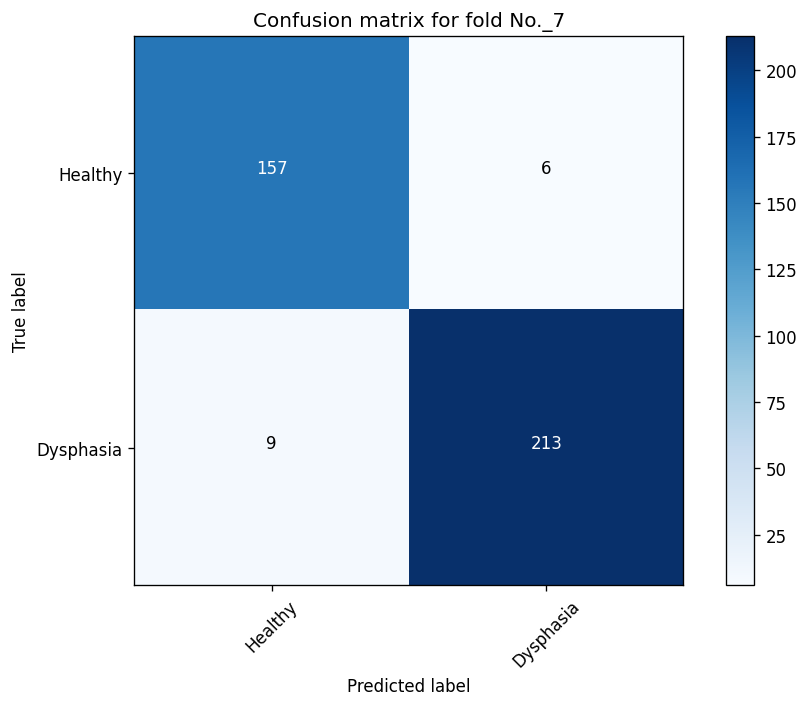

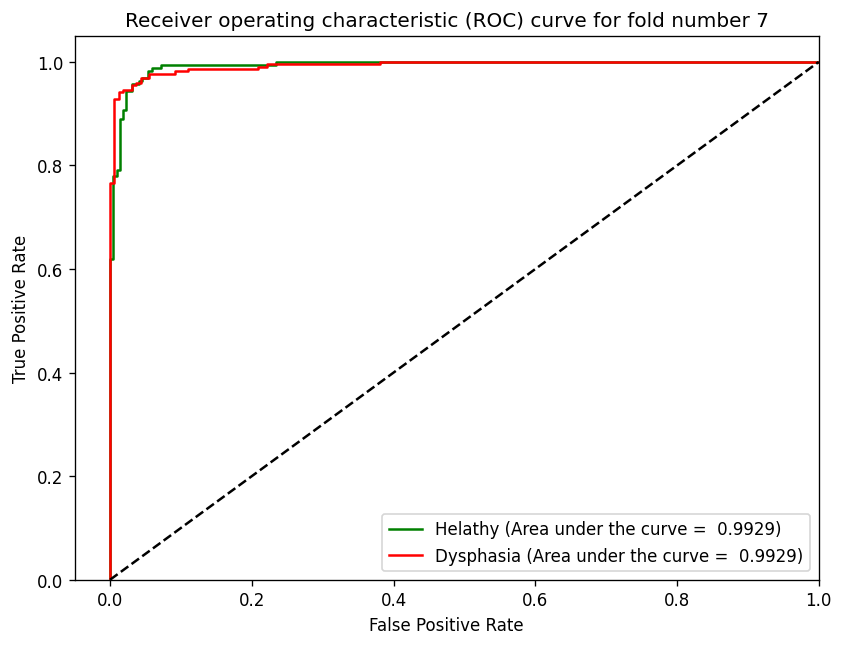

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 00075: early stopping
Score for fold 8: loss of 0.7358198761940002; accuracy of 81.03896379470825% and training_loss: 0.5689214468002319; traing_acc: 84.97692942619324%
fold 8 training time is 0:07:41.780324
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

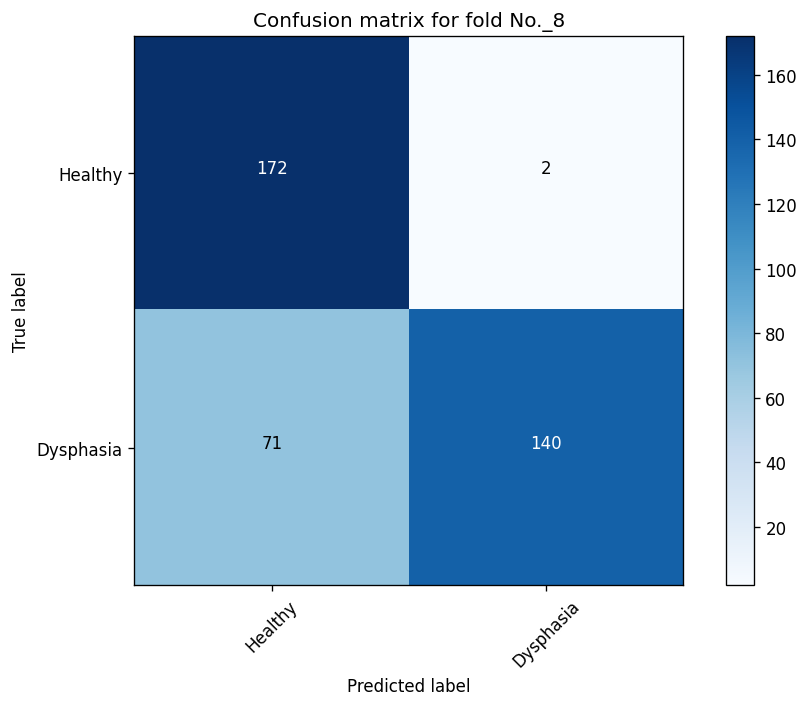

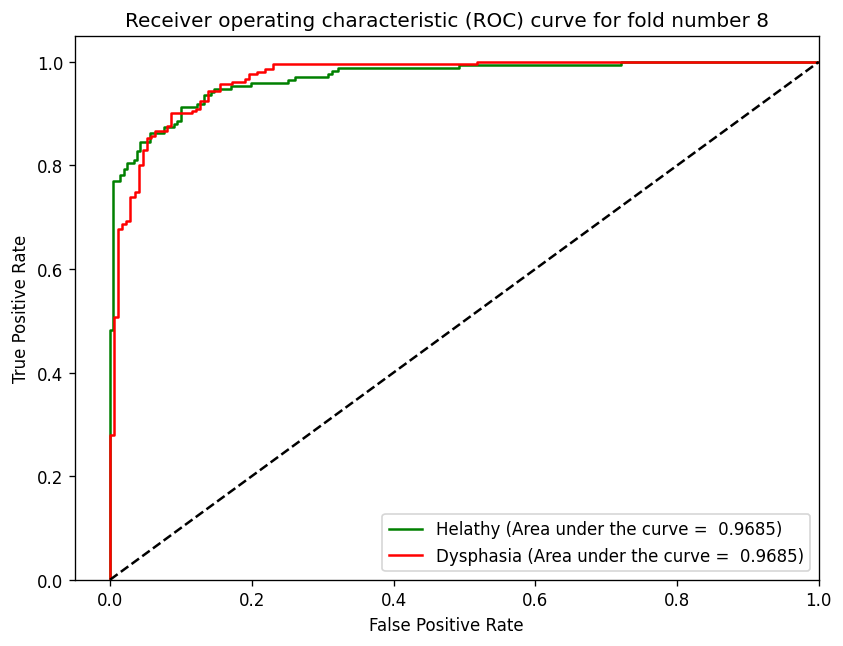

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 00059: early stopping
Score for fold 9: loss of 0.24902333319187164; accuracy of 94.02597546577454% and training_loss: 0.11228781193494797; traing_acc: 97.34717607498169%
fold 9 training time is 0:06:07.646749
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

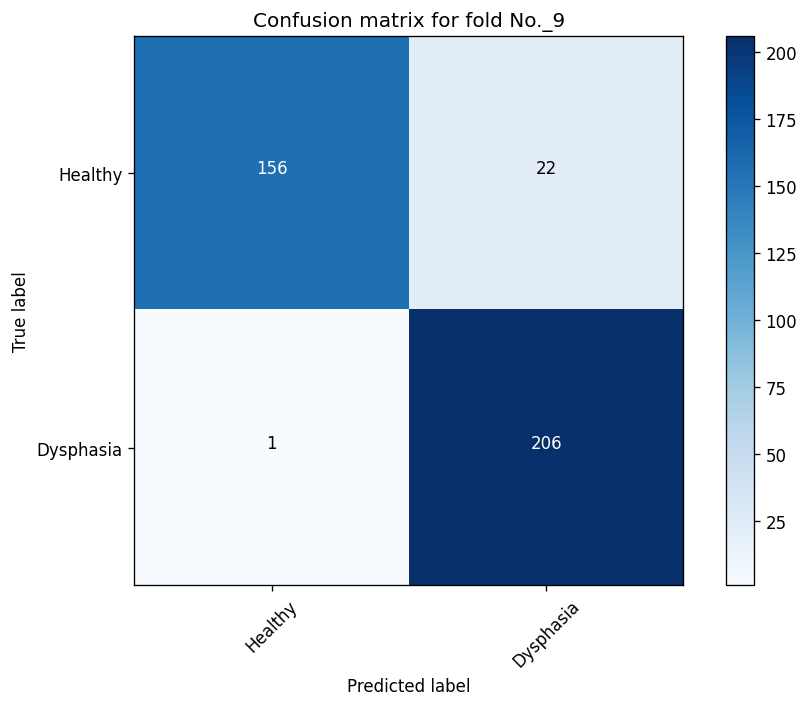

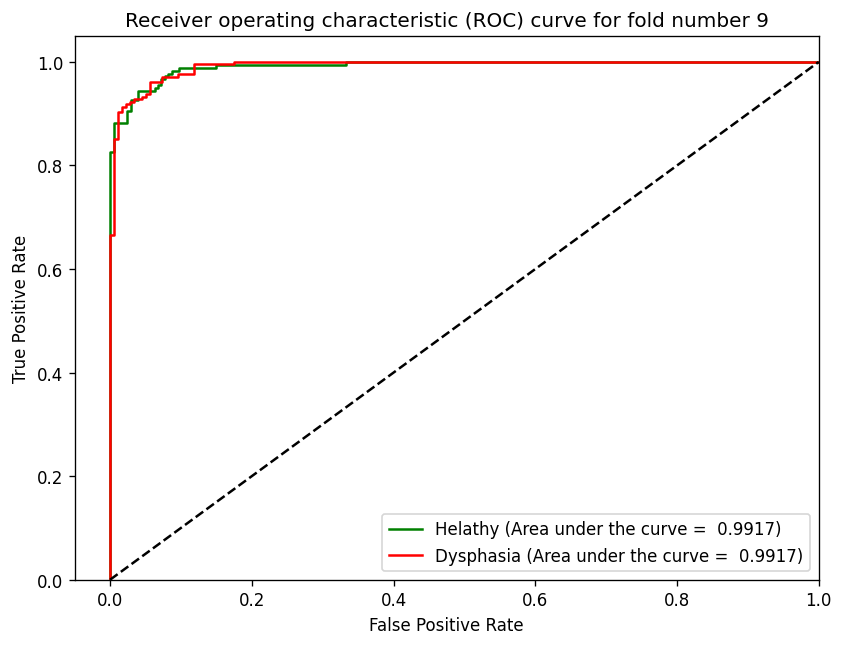

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 00057: early stopping
Score for fold 10: loss of 0.17739902436733246; accuracy of 95.84415555000305% and training_loss: 0.06787439435720444; traing_acc: 99.65397715568542%
fold 10 training time is 0:05:56.895200
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

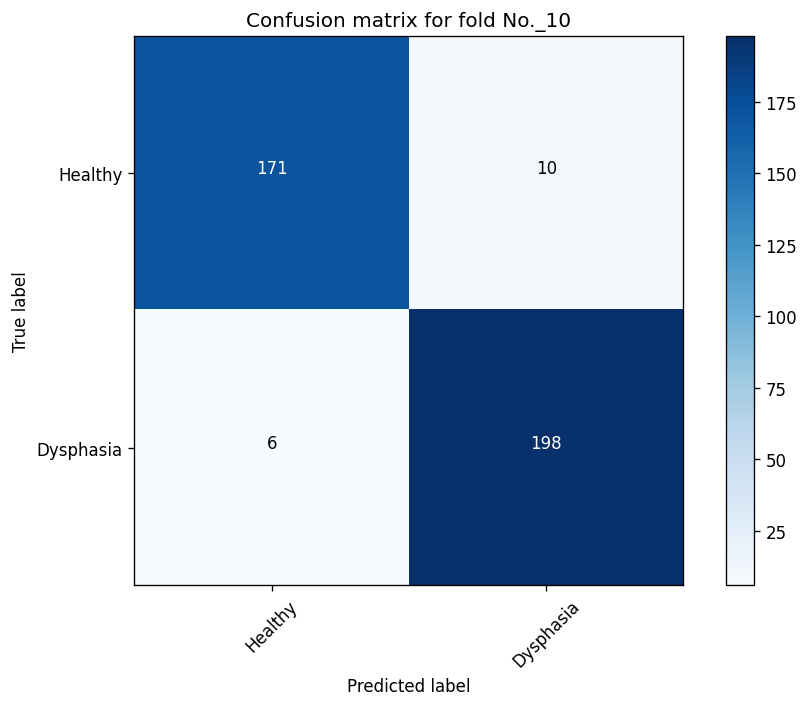

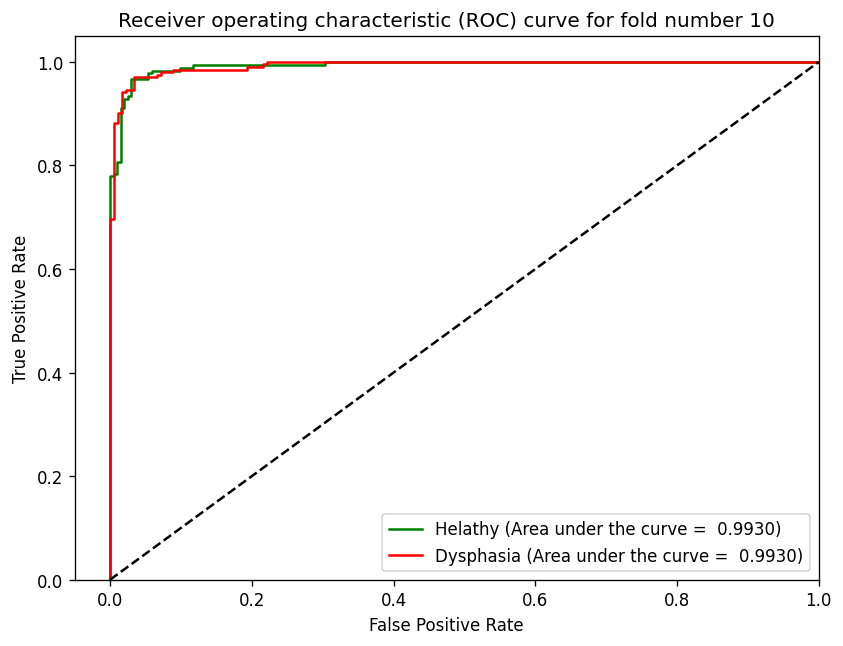

-------------------------------------------------------------------------
Score per fold
-----------------------------------------------------------------------
> Fold 1 - Loss: 0.33509817719459534 - Accuracy: 88.08290362358093% - Training_Loss: 0.23945015668869019 - Training_Acc: 92.64493584632874%
-----------------------------------------------------------------------
> Fold 2 - Loss: 0.20924176275730133 - Accuracy: 95.85492014884949% - Training_Loss: 0.17969737946987152 - Training_Acc: 95.76002359390259%
-----------------------------------------------------------------------
> Fold 3 - Loss: 0.20947182178497314 - Accuracy: 93.78238320350647% - Training_Loss: 0.11010989546775818 - Training_Acc: 97.72137403488159%
-----------------------------------------------------------------------
> Fold 4 - Loss: 0.1459449976682663 - Accuracy: 96.62337899208069% - Training_Loss: 0.07415542006492615 - Training_Acc: 99.25028681755066%
----------------------------------------------------------------

In [ ]:
# K-fold cross validation code, Updated 

batch_size = 32
no_epochs = 1000
num_folds = 10
fold_no = 1

# Define per-fold score containers
acc_per_fold  = []
loss_per_fold = []
train_acc_per_fold  = []
train_loss_per_fold = []
history_all_fold    = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

last_fold_time = start = datetime.now()
for train, test in kfold.split(X, y):
  model = get_model()

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # time_stamp = datetime.now(pytz.timezone('Asia/Calcutta')).strftime("%m/%d/%Y, %H:%M:%S").replace(" ", "").replace("/", "-").replace(":", "-").replace(",", "_")
  modelPathSave = f'/content/drive/My Drive/saveModels/dysphasia_1D_raw/fold_{fold_no}.hdf5'
  pathToSaveCSV = f'/content/drive/My Drive/saveModels/dysphasia_1D_raw/csv/fold_{fold_no}.csv'
  checkpoint = ModelCheckpoint(modelPathSave, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
  early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
  csv_logger = CSVLogger(pathToSaveCSV, append=False, separator=',')

  steps = int(X[train].shape[0] / 32)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(
              X[train], to_categorical(LabelEncoder().fit_transform(y[train])),
              batch_size= batch_size,
              epochs= no_epochs,
              callbacks = [checkpoint, csv_logger, early_stop],
              validation_data = (X[test], to_categorical(LabelEncoder().fit_transform(y[test]))),
              use_multiprocessing = True,
              # steps_per_epoch = steps,
              verbose=0)
  
  # Generate generalization metrics
  train_scores = model.evaluate(X[train], to_categorical(LabelEncoder().fit_transform(y[train])), verbose=0)
  val_scores = model.evaluate(X[test], to_categorical(LabelEncoder().fit_transform(y[test])), verbose=0)

  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {val_scores[0]}; {model.metrics_names[1]} of {val_scores[1]*100}% and training_loss: {train_scores[0]}; traing_acc: {train_scores[1]*100}%')
  print(f'fold {fold_no} training time is {datetime.now() - last_fold_time}')
  last_fold_time = datetime.now()

  train_acc_per_fold.append(train_scores[1]*100)
  train_loss_per_fold.append(train_scores[0])
  acc_per_fold.append(val_scores[1] * 100)
  loss_per_fold.append(val_scores[0])
  history_all_fold.append(history.history)

  # call confusion matrix drawing function
  cnf_matrix_for_each_fold(model, X[test], y[test], fold_no)
  # ROC AUC drawing
  draw_roc(model, X[test], to_categorical(LabelEncoder().fit_transform(y[test])), fold_no)
  fold_no = fold_no + 1

duration = datetime.now() - start
# == Provide average scores ==
print('-------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Training_Loss: {train_loss_per_fold[i]} - Training_Acc: {train_acc_per_fold[i]}%')
print('-------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Training Accuracy: {np.mean(train_acc_per_fold)} (+- {np.std(train_acc_per_fold)})')
print(f'> Training Loss: {np.mean(train_loss_per_fold)}')
print(f'> Validation Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Validation Loss: {np.mean(loss_per_fold)}')
print('-------------------------------------------------------------------------')
print("Training completed in time: ", duration)

In [ ]:
# saving the data 

np.save('/content/drive/My Drive/saved_arrays/1D_raw_train_acc_per_fold.npy', train_acc_per_fold)
np.save('/content/drive/My Drive/saved_arrays/1D_raw_train_loss_per_fold.npy', train_loss_per_fold)
np.save('/content/drive/My Drive/saved_arrays/1D_raw_acc_per_fold.npy', acc_per_fold)
np.save('/content/drive/My Drive/saved_arrays/1D_raw_loss_per_fold.npy', loss_per_fold)
np.save('/content/drive/My Drive/saved_arrays/1D_raw_history_all_fold.npy', history_all_fold)

In [ ]:
# loading the data
load_train_acc_per_fold = np.load('/content/drive/My Drive/saved_arrays/1D_raw_train_acc_per_fold.npy')
load_train_loss_per_fold = np.load('/content/drive/My Drive/saved_arrays/1D_raw_train_loss_per_fold.npy')
load_acc_per_fold = np.load('/content/drive/My Drive/saved_arrays/1D_raw_acc_per_fold.npy')
load_loss_per_fold = np.load('/content/drive/My Drive/saved_arrays/1D_raw_loss_per_fold.npy')
load_history_all_fold = np.load('/content/drive/My Drive/saved_arrays/1D_raw_history_all_fold.npy', allow_pickle=True)

In [ ]:
from operator import itemgetter

loss =         list(map(itemgetter("loss"), load_history_all_fold))
val_loss =     list(map(itemgetter("val_loss"), load_history_all_fold))
accuracy =     list(map(itemgetter("accuracy"), load_history_all_fold))
val_accuracy = list(map(itemgetter("val_accuracy"), load_history_all_fold))

loss = [np.mean(i) for i in zip(*loss)]
val_loss = [np.mean(i) for i in zip(*val_loss)]
accuracy = [np.mean(i) for i in zip(*accuracy)]
val_accuracy = [np.mean(i) for i in zip(*val_accuracy)]

avg_history = {'loss':loss, 'val_loss':val_loss, 'accuracy':accuracy, 'val_accuracy':val_accuracy}
print(avg_history)

{'loss': [0.4987391531467438, 0.3746254950761795, 0.33357526659965514, 0.29748696386814116, 0.27531126141548157, 0.26096264719963075, 0.24474017918109894, 0.23610213547945022, 0.22306595295667647, 0.2147928074002266, 0.2100769117474556, 0.205752432346344, 0.19327024966478348, 0.18602063208818437, 0.18455195128917695, 0.1791975423693657, 0.17229582965373993, 0.17006717324256898, 0.16184191256761551, 0.16555903255939483, 0.15495378971099855, 0.15172985345125198, 0.1589553326368332, 0.14876796007156373, 0.14481398984789848, 0.14420315474271775, 0.14261482208967208], 'val_loss': [0.5994525969028472, 0.5477588206529618, 0.43955364227294924, 0.48726068139076234, 0.5293415635824203, 0.5288379848003387, 0.4591763958334923, 0.3882550835609436, 0.43023533523082735, 0.3732638701796532, 0.5261119738221168, 0.3324104189872742, 0.7906655743718147, 0.33352412581443786, 0.4827083244919777, 0.5278694152832031, 0.5086648836731911, 0.732171818614006, 0.6637840896844864, 0.286486442387104, 0.3701547175645

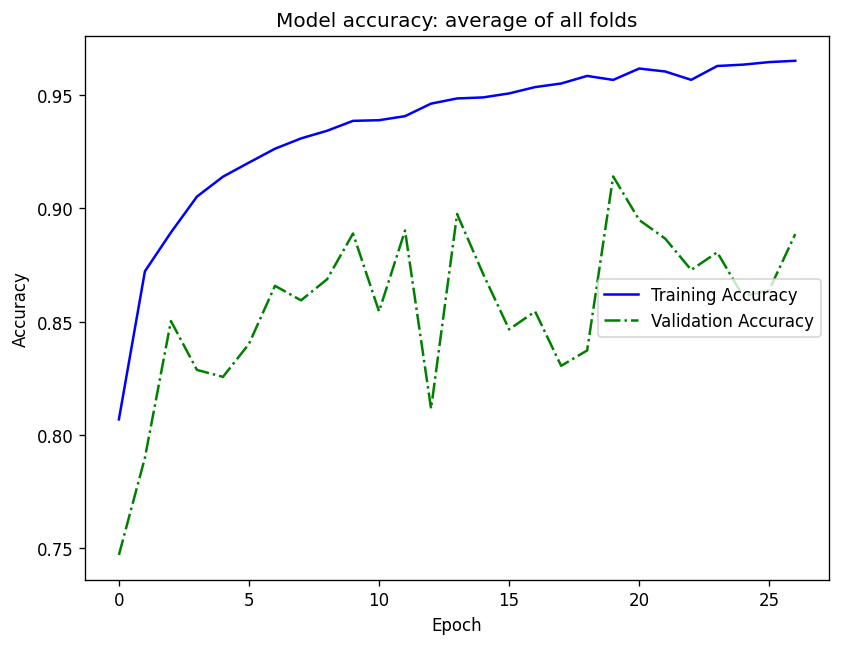

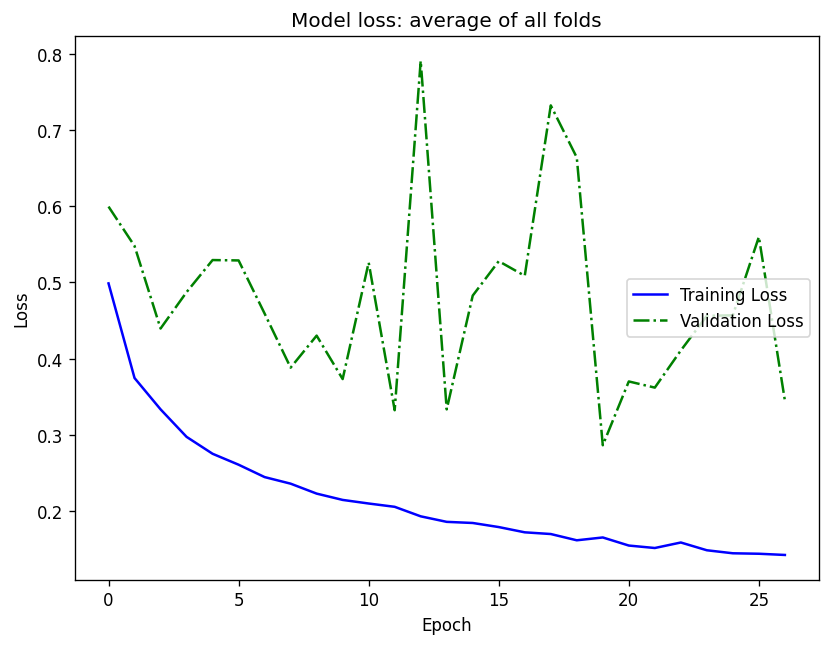

In [ ]:
# plot diagnostic learning curves, when dict history is saved without History object

def summarize_diagnostics(history, slug=""):
  # Plot training & validation accuracy values
  figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
  plt.plot(history['accuracy'], 'b')
  plt.plot(history['val_accuracy'], 'g', linestyle="-.")
  plt.title('Model accuracy'+slug)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='center right')
  # plt.savefig('Accuracy'+slug+'.png', bbox_inches='tight')
  plt.show()

  # Plot training & validation loss values
  figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
  plt.plot(history['loss'], 'b')
  plt.plot(history['val_loss'], 'g', linestyle="-.")
  plt.title('Model loss'+slug)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='center right')
  # plt.savefig('Loss'+slug+'.png', bbox_inches='tight')
  plt.show()

#--------------------------------------------------------------------------- learning curves
# print(history.history.keys())
# summarize_diagnostics(history)
# summarize_diagnostics(load_history_all_fold[5])
summarize_diagnostics(avg_history, ": average of all folds")

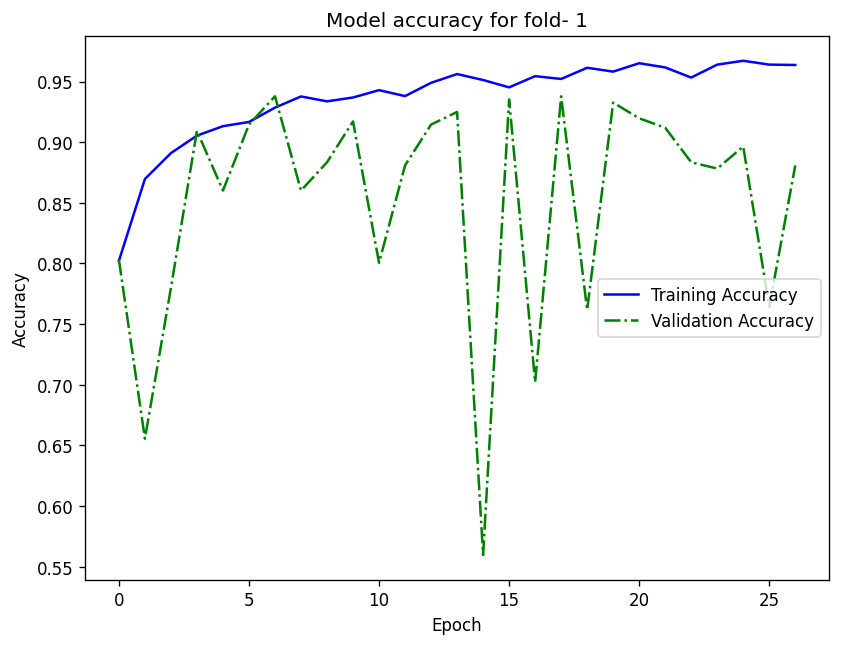

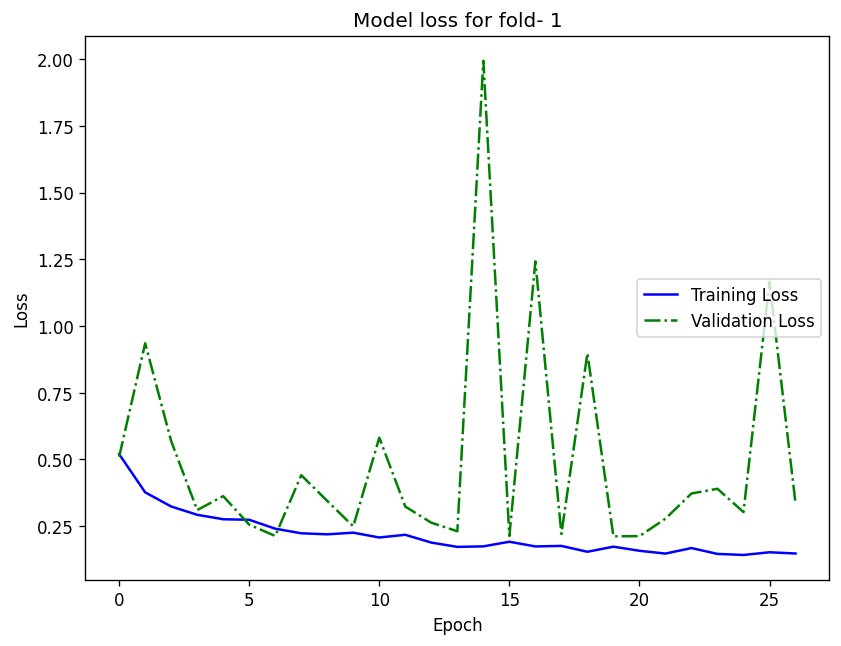

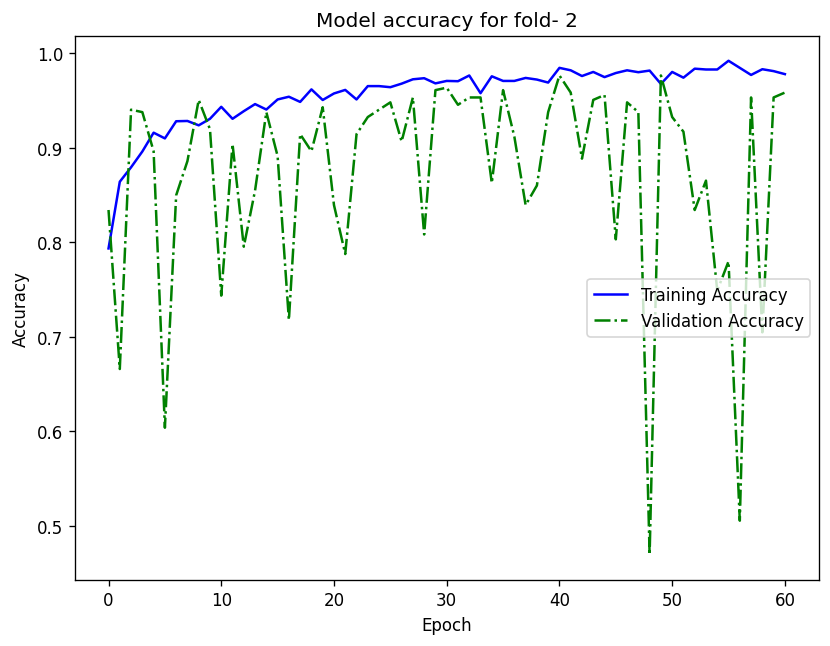

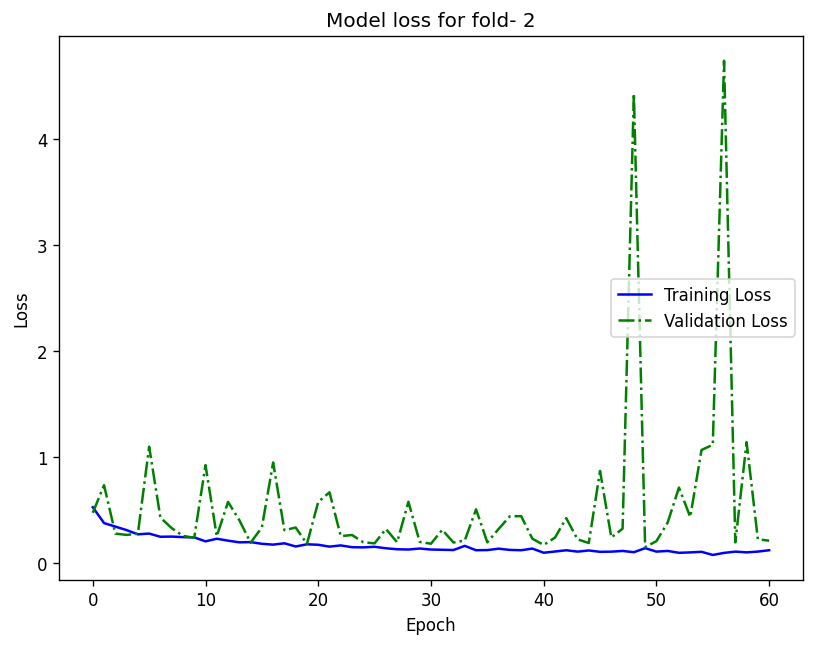

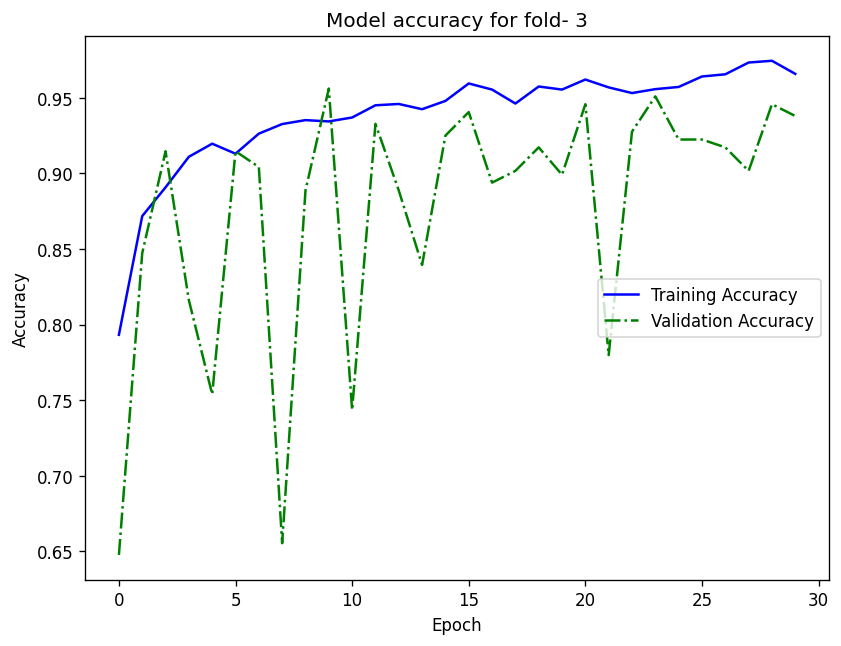

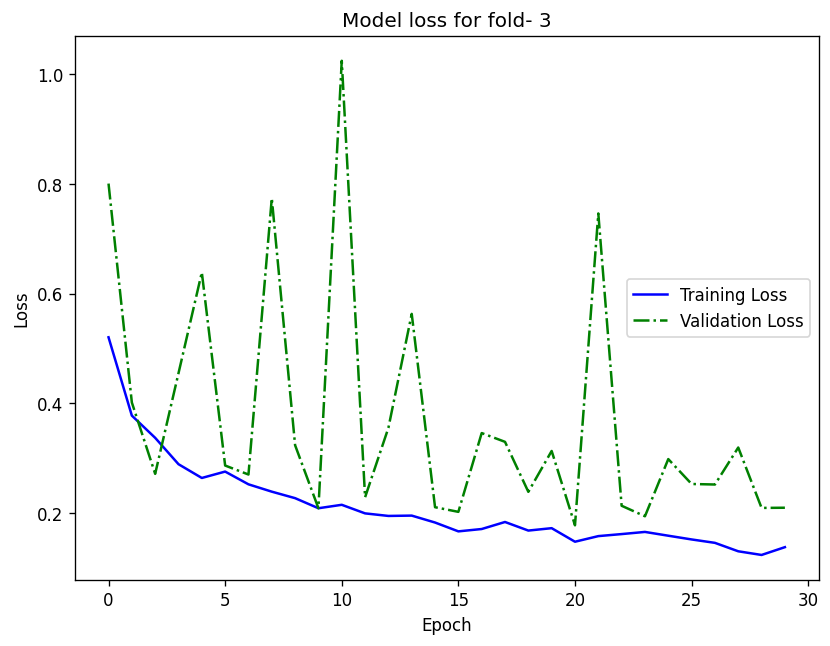

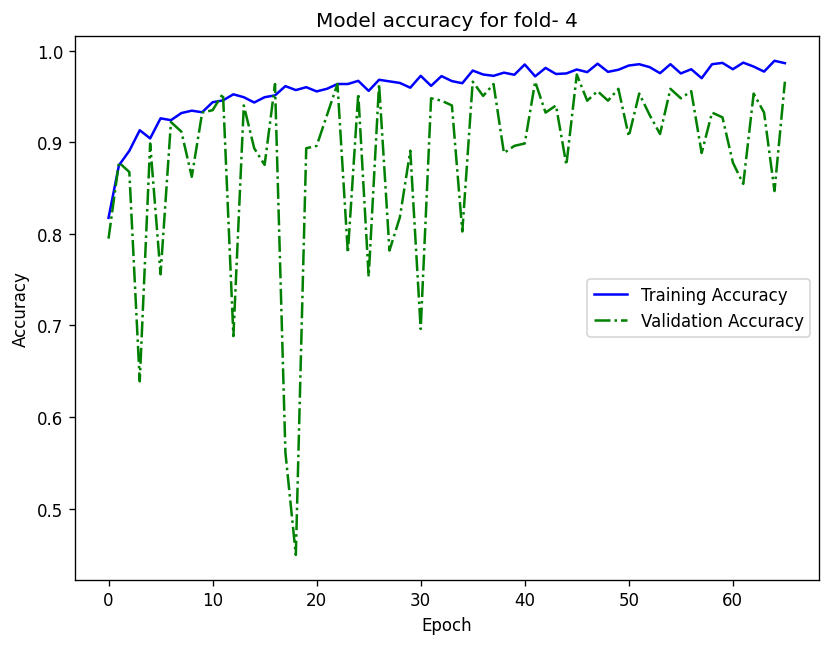

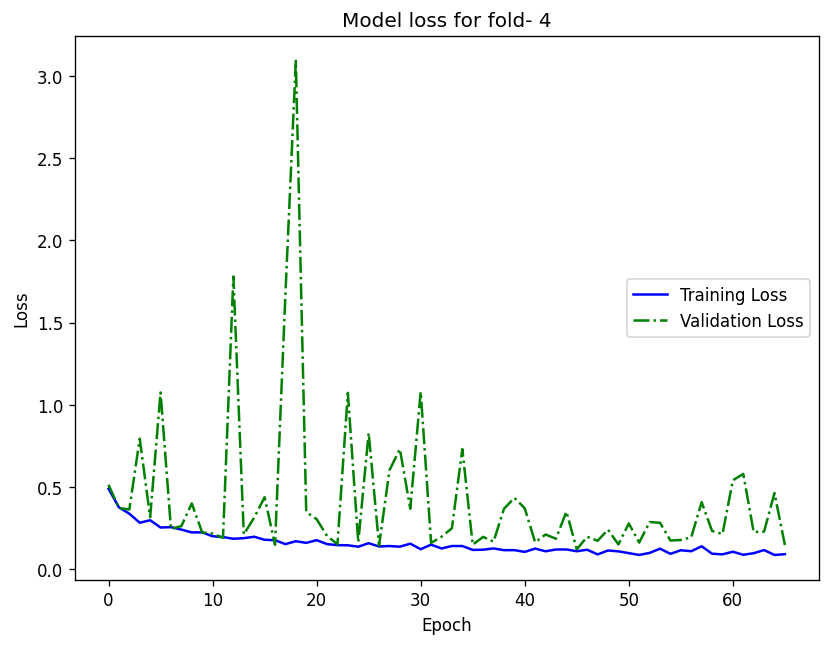

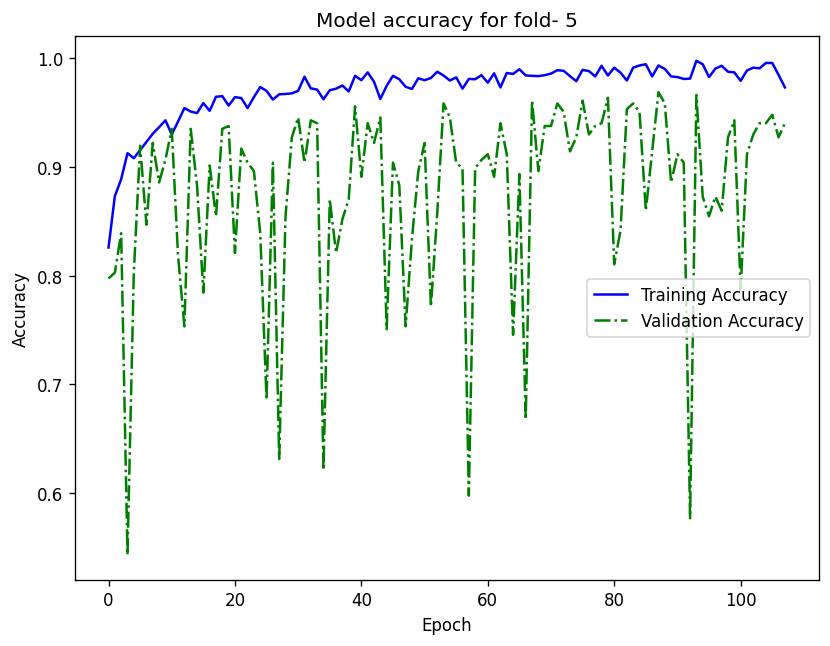

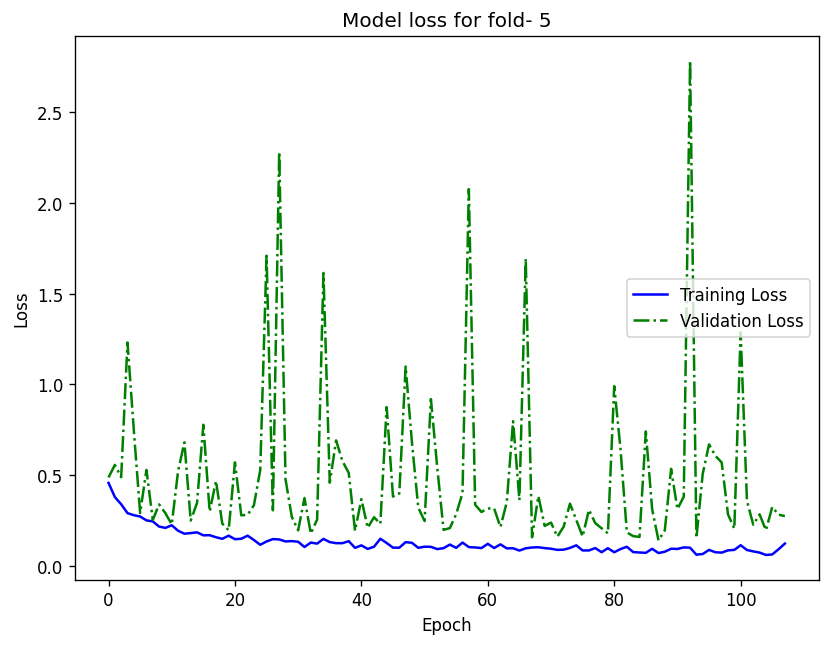

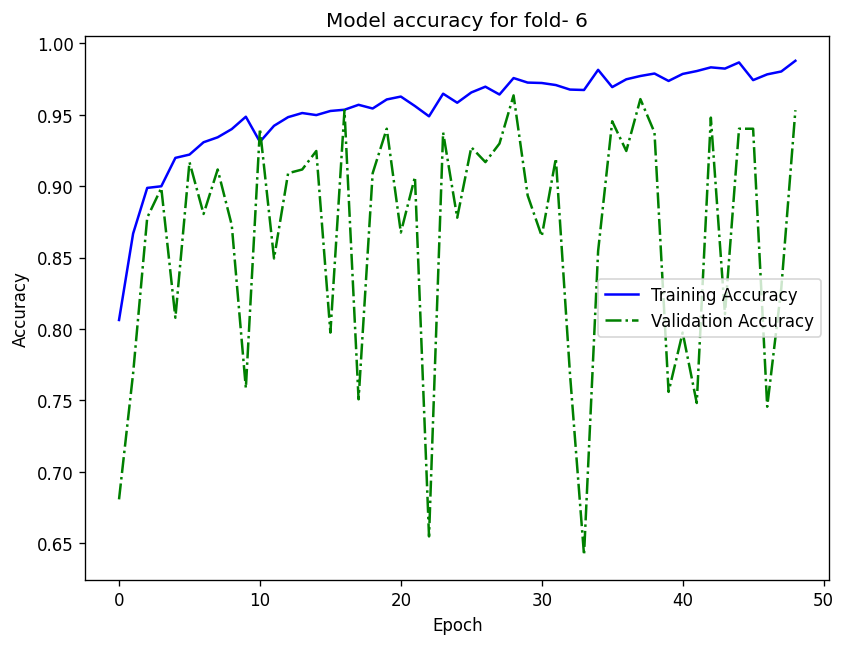

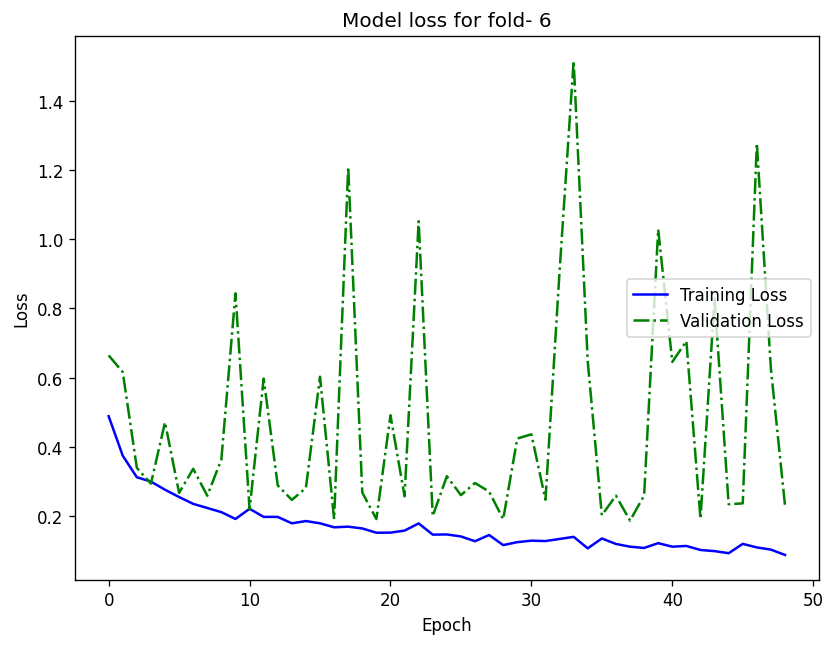

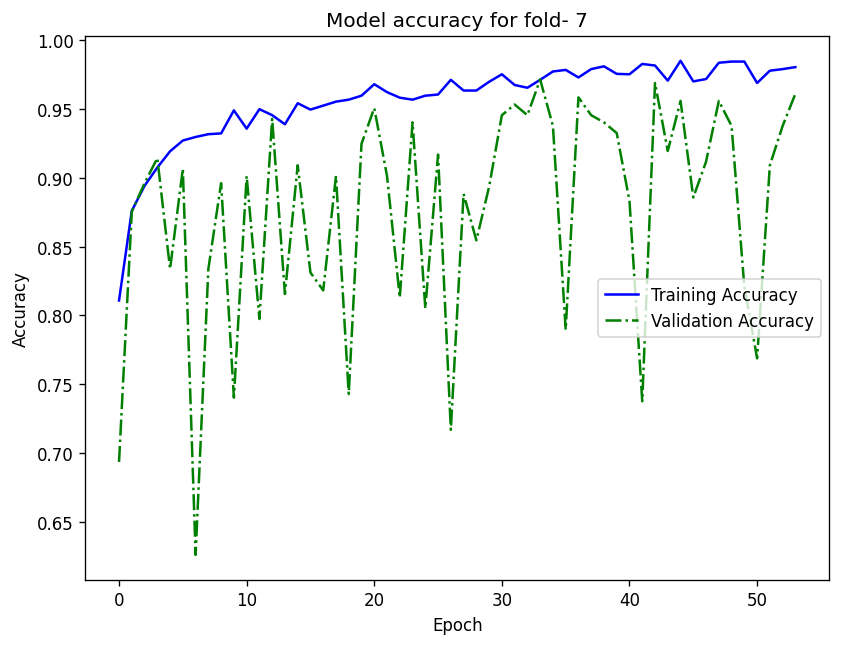

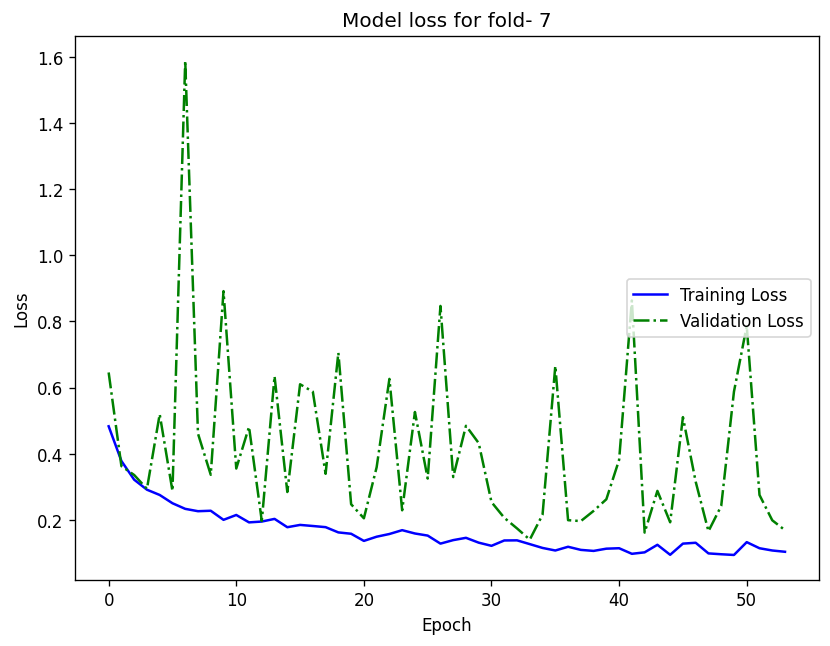

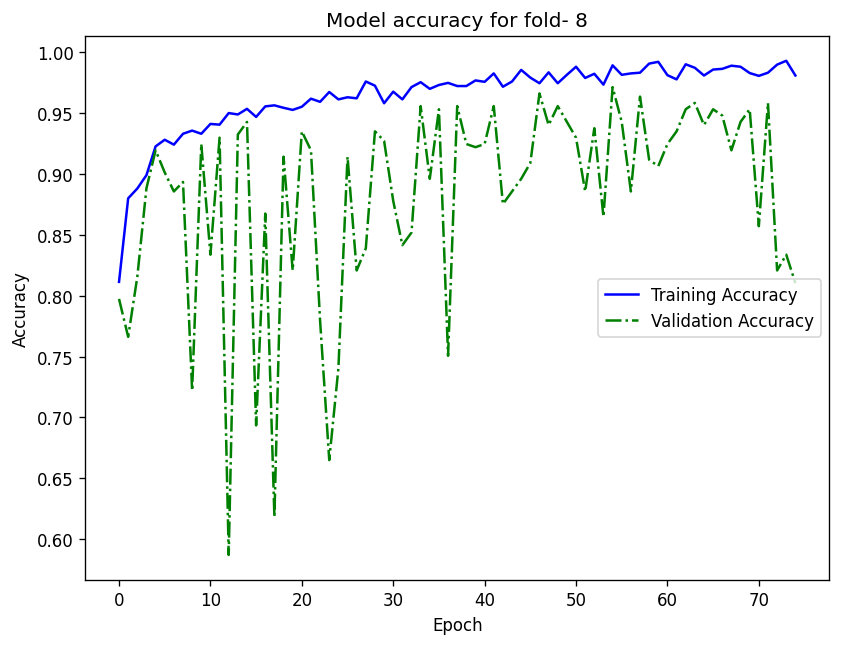

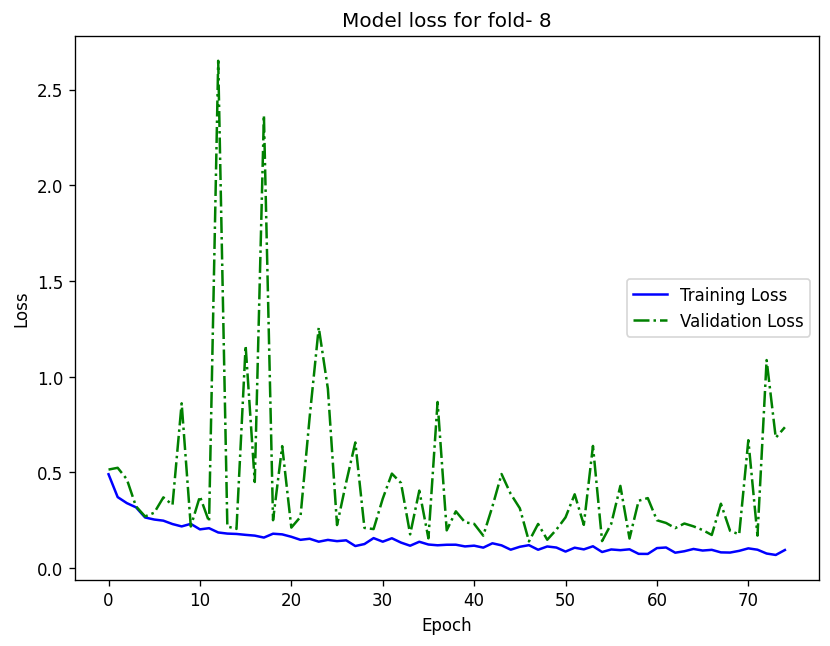

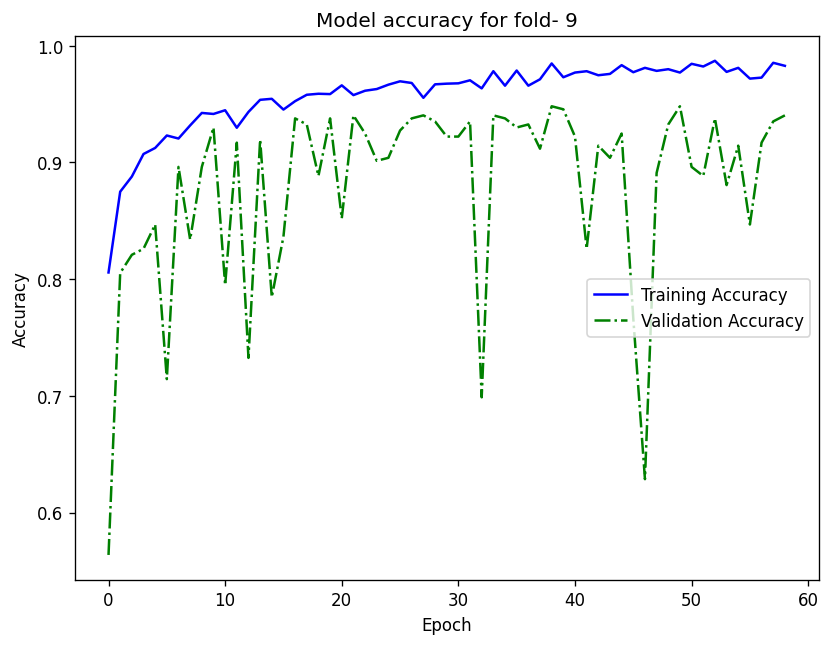

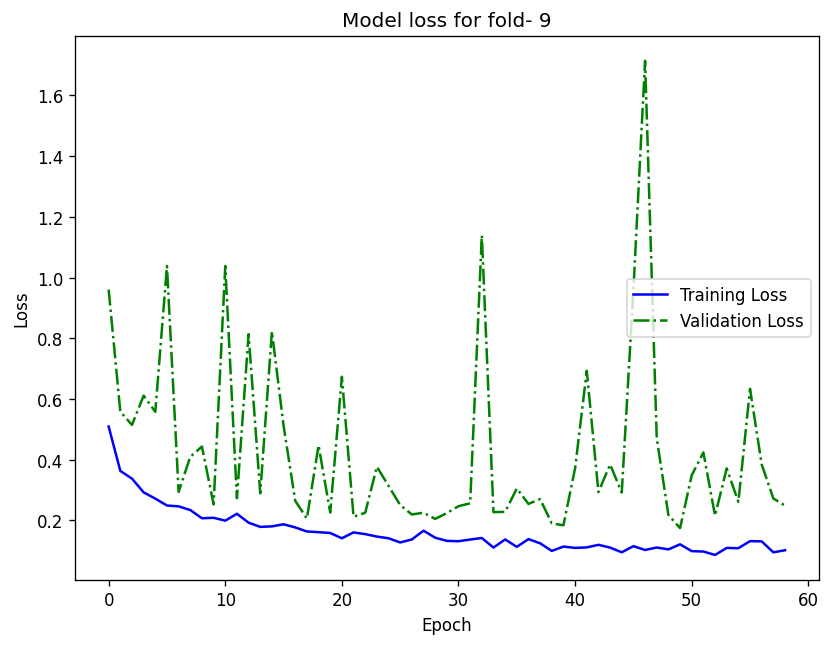

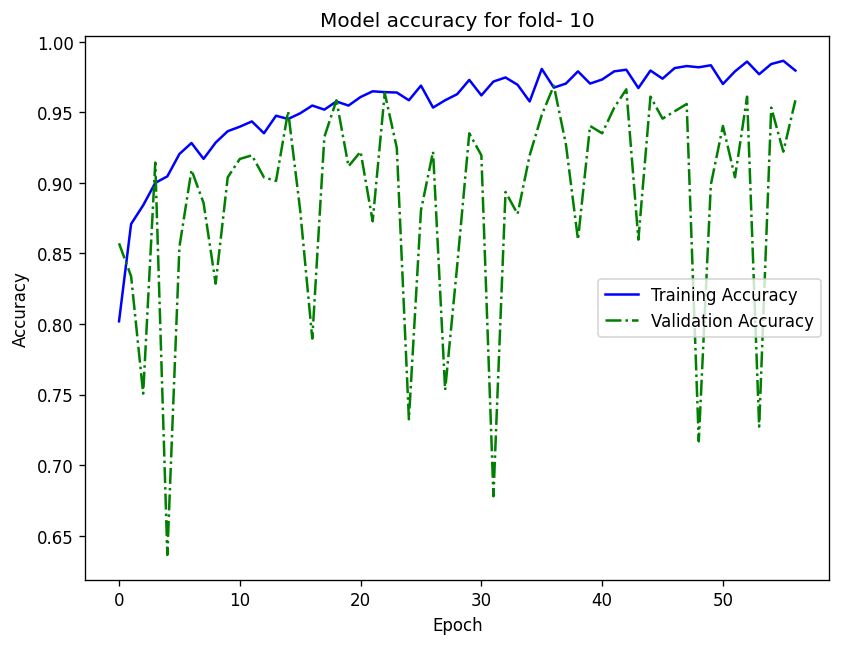

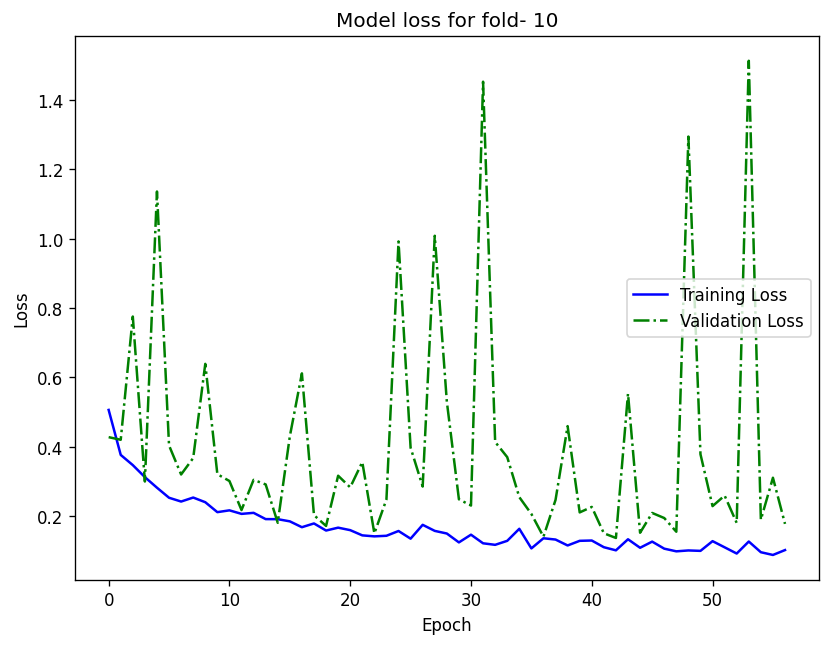

In [ ]:
# plotting history of each fold

for i in range(10):
  summarize_diagnostics(load_history_all_fold[i], ' for fold- '+str(i+1))